## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
#To Ignore Warning messages

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("D:\\Udemy - Python for Time Series Data Analysis\\TSA_COURSE_NOTEBOOKS\\Data\\RestaurantVisitors.csv",index_col='date',parse_dates=True)

In [4]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [5]:
#Assigning Frequencies
df.index.freq='D'

In [6]:
#Dropping Null Values
df1=df.dropna()

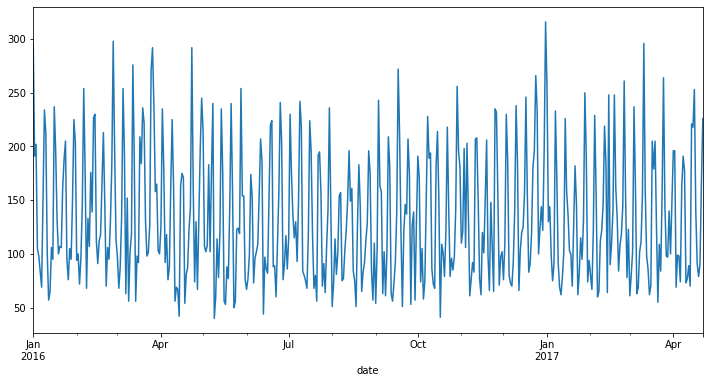

In [7]:
ax=df1['total'].plot(figsize=(12,6))

In [8]:
#Checking For Holidays
df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

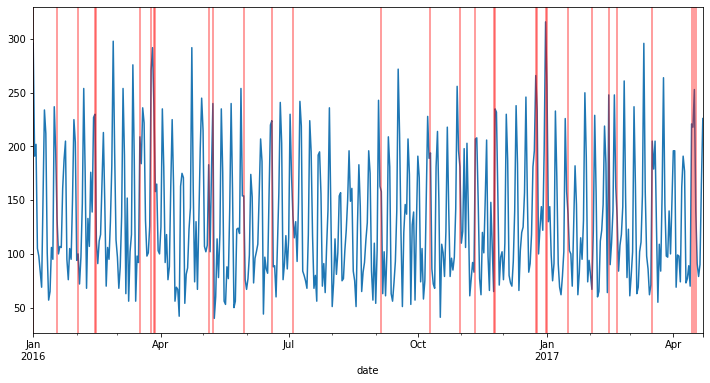

In [9]:
# Plotting Holidays with red vertical lines
ax=df1['total'].plot(figsize=(12,6))
for day in df1.query('holiday==1').index:
    ax.axvline(x=day,c='r',alpha=0.5);

In [10]:
len(df1)

478

In [11]:
train=df1.iloc[:400]
test=df1.iloc[400:]

In [12]:
# Checking the Summary of the dataset
auto_arima(df1['total'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2386.240
Date:                   Wed, 02 Dec 2020   AIC                           4780.480
Time:                           00:36:05   BIC                           4797.159
Sample:                                0   HQIC                          4787.037
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.7969      1.885      3.075      0.002       2.102       9.492
ar.S.L7        0.9564      0.014     67.866      0.000       0.929       0.984
ma.S.L7       -0.7487      0.050    -14.893      0.000      -0.847      -0.650
sigma2      1234.6103     73.789     16.732      0.000    1089.987    1379.234
===================================================================================
Ljung-Box (Q):                       73.69   Jarque-Bera (JB):                60.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.74
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# Creating a model based on the (p,d,q) values from the summary
model=SARIMAX(train['total'],enforce_invertibility=False,order=(1,0,0),seasonal_order=(2,0,0,7))

In [14]:
result=model.fit()

In [15]:
# Model Predictions
predictions=result.predict(start=len(train),end=len(df1)-1).rename('SARIMAX model')

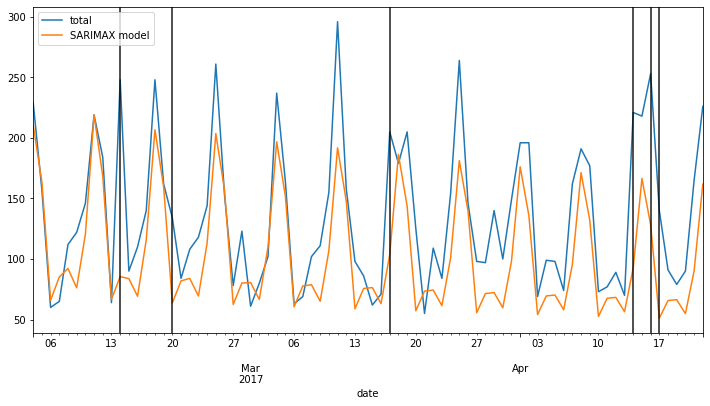

In [16]:
ax=test['total'].plot(figsize=(12,6),legend=True)
predictions.plot(legend=True,figsize=(12,6))
for days in test.query('holiday==1').index:
    ax.axvline(x=days,color='black',alpha=0.9);

In [17]:
#Checking for Error Values

from statsmodels.tools.eval_measures import rmse,mse

In [18]:
rmse(test['total'],predictions)

47.914217985933625

In [19]:
mse(test['total'],predictions)

2295.7722852035654

In [20]:
# Checking for summary with an Exogenous Variable
auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2374.877
Date:                             Wed, 02 Dec 2020   AIC                           4761.754
Time:                                     00:37:10   BIC                           4786.772
Sample:                                 01-01-2016   HQIC                          4771.590
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     22.1440      3.998      5.539      0.000      14.309      29.979
holiday       59.1924      4.895     12.093      0.000      49.598      68.786
ar.L1          0.3250      0.050      6.550      0.000       0.228       0.422
ar.S.L7        0.7617      0.038     19.873      0.000       0.687       0.837
ma.S.L7       -0.1964      0.072     -2.713      0.007      -0.338      -0.054
sigma2      1292.6457    102.572     12.602      0.000    1091.608    1493.684
===================================================================================
Ljung-Box (Q):                      140.09   Jarque-Bera (JB):                 6.91
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               0.94   Skew:                             0.29
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
model_ex=SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,0),seasonal_order=(1,0,[1],7),enforce_invertibility=False)

In [22]:
res_ex=model_ex.fit()

In [23]:
# Predicting values with Exogenous model
pred_ex=res_ex.predict(start=len(train),end=len(df1)-1,exog=test[['holiday']]).rename('SARIMAX with exogenous')

<AxesSubplot:xlabel='date'>

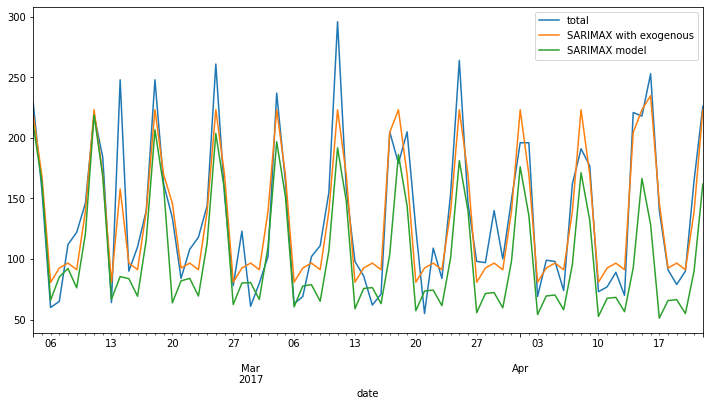

In [24]:
test['total'].plot(legend=True,figsize=(12,6))
pred_ex.plot(legend=True,figsize=(12,6))
predictions.plot(legend=True,figsize=(12,6))

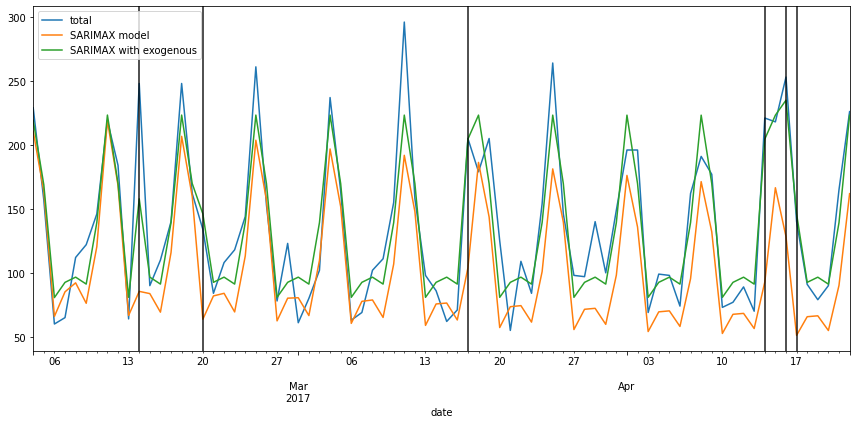

In [25]:
ax=test['total'].plot(figsize=(12,6),legend=True)
predictions.plot(legend=True,figsize=(12,6))
pred_ex.plot(legend=True,figsize=(12,6))
plt.tight_layout()
for days in test.query('holiday==1').index:
    ax.axvline(x=days,color='black',alpha=0.9);

In [26]:
rmse(test['total'],pred_ex)

24.167340452135146

In [27]:
mse(test['total'],pred_ex)

584.0603445294079

In [28]:
rmse(test['total'],predictions)

47.914217985933625

In [29]:
mse(test['total'],predictions)

2295.7722852035654

## SARIMAX FORECASTING

In [30]:
model_fore=SARIMAX(df1['total'],exog=df1[['holiday']],order=(1,0,0),seasonal_order=(1,0,[1],7),enforce_invertibility=False)

In [31]:
res_fore=model_fore.fit()

In [32]:
exog_fore=df[478:]['holiday']

In [33]:
fcast=res_fore.predict(start=len(df1),end=len(df1)+38,exog=exog_fore).rename('Final SARIMAX Forecast')

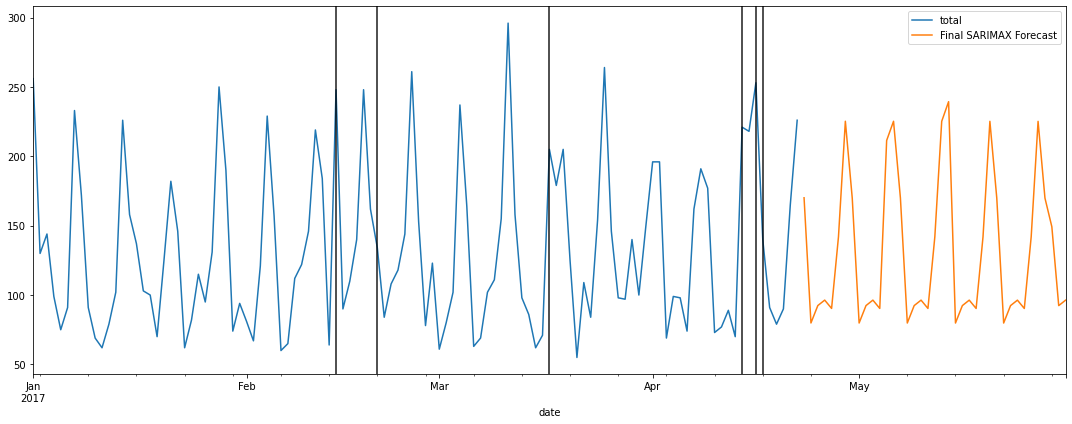

In [34]:
ax=df['total'].loc['2017-01-01':].plot(figsize=(15,6),legend=True)
fcast.plot(figsize=(15,6),legend=True)
plt.tight_layout()
for days in test.query('holiday==1').index:
    ax.axvline(x=days,color='black',alpha=0.9);
